In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Achievement File
df = pd.read_excel('Achievement.xlsx')
df.head()

,Family,Peer,School,Achieve
0,0.60814,0.03509,0.16607,0.649547
1,0.79369,0.47924,0.53356,2.224851
2,-0.82630,-0.61951,-0.78635,0.396662
3,-1.25310,-1.21675,-1.04076,0.111826
4,0.17399,-0.18517,0.14229,0.057950


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Family   70 non-null     float64
 1   Peer     70 non-null     float64
 2   School   70 non-null     float64
 3   Achieve  70 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [4]:
df.describe(include='all')

,Family,Peer,School,Achieve
count,70.000000,70.000000,70.000000,70.000000
mean,0.049383,0.046314,0.031906,8.663605
std,1.083152,0.924799,1.023538,23.116423
min,-2.069930,-1.941990,-2.167380,0.001362
25%,-0.720243,-0.615413,-0.620367,0.176495
50%,0.084405,0.005565,0.052965,0.963616
75%,0.826788,0.734865,0.710035,4.626623
max,2.833840,2.473980,2.792220,158.315519


In [5]:
# Generate Correlation
df.corr()

,Family,Peer,School,Achieve
Family,1.000000,0.960081,0.985684,0.097107
Peer,0.960081,1.000000,0.982160,0.135428
School,0.985684,0.982160,1.000000,0.103488
Achieve,0.097107,0.135428,0.103488,1.000000


In [6]:
#check
from scipy.stats import pearsonr
pearsonr(df.Family, df.Peer)

(0.9600805685627797, 2.3924197621161908e-39)

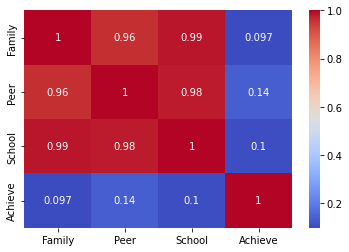

In [7]:
# To visualise correlation in a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

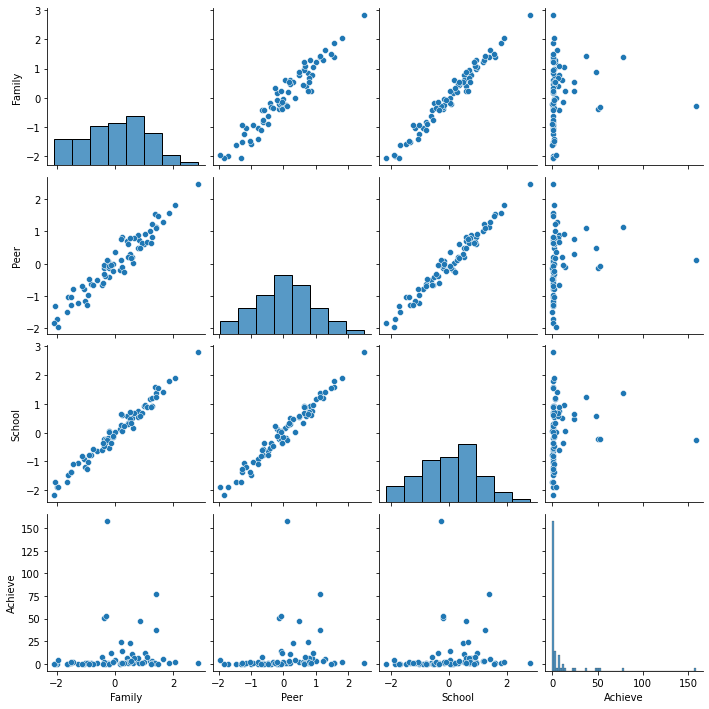

In [8]:
# To visualise pairwise relationship using Seaborn pairplot
sns.pairplot(df)

In [9]:
# Import the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [10]:
# Model 1: MLR model consisting of all 3 predictors
mlr = ols('Achieve ~ Family + Peer + School', df).fit()
print(mlr.summary())
print('\nMSE =', mlr.mse_resid)
print("\nVIF of", mlr.model.exog_names[1], vif(mlr.model.exog,1))
print("VIF of", mlr.model.exog_names[2], vif(mlr.model.exog,2))
print("VIF of", mlr.model.exog_names[3], vif(mlr.model.exog,3))

                            OLS Regression Results                            
Dep. Variable:                Achieve   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9952
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.401
Time:                        12:13:10   Log-Likelihood:                -317.11
No. Observations:                  70   AIC:                             642.2
Df Residuals:                      66   BIC:                             651.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1129      2.799      2.899      0.0

In [11]:
#Omnibus and JB probability figures both suggest that residuals are not normal.

In [12]:
# Check homoscedasticity:
sm.stats.het_breuschpagan(mlr.resid, mlr.model.exog)

(3.6497616165453293,
 0.30185163806417914,
 1.2101652913430962,
 0.3129811251261963)

In [13]:
# Residuals are homo; have constant variance according to BP

C:\Users\genep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


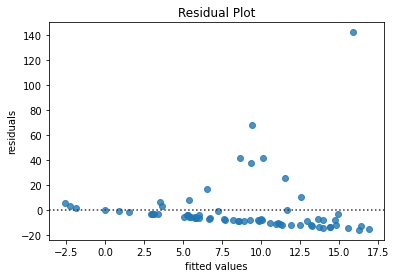

In [14]:
sns.residplot(mlr.fittedvalues, mlr.resid)
plt.title('Residual Plot')
plt.xlabel('fitted values')
plt.ylabel('residuals');

In [15]:
# Linear model is inadequate accoring to resid plot; 
# plot shows residuals have non constant variance
# Issue present is that residuals are non normal and are non constant. 
# High multicollinearity exists also between predictors.

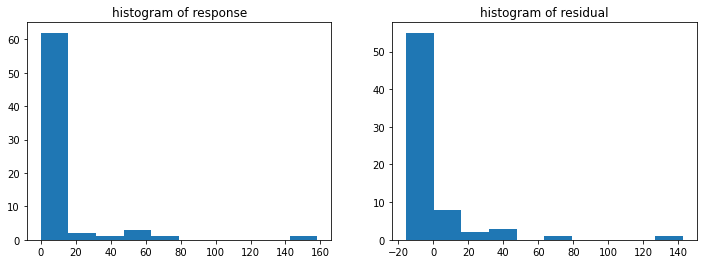

In [16]:
# Have to tranform response to solve non constant variance and non normality
# To check skewness, produce histograms
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
plt.hist(df.Achieve)  # the response Y
plt.title('histogram of response');

ax = fig.add_subplot(122)
plt.hist(mlr.resid)  # the residuals
plt.title('histogram of residual');

In [17]:
# We have a right skewed disitribution, so can do further exploration by taking 
# the log of the response term

In [18]:
df['Achieve']= np.log(df['Achieve'])
df.head()

,Family,Peer,School,Achieve
0,0.60814,0.03509,0.16607,-0.43148
1,0.79369,0.47924,0.53356,0.79969
2,-0.82630,-0.61951,-0.78635,-0.92467
3,-1.25310,-1.21675,-1.04076,-2.19081
4,0.17399,-0.18517,0.14229,-2.84818


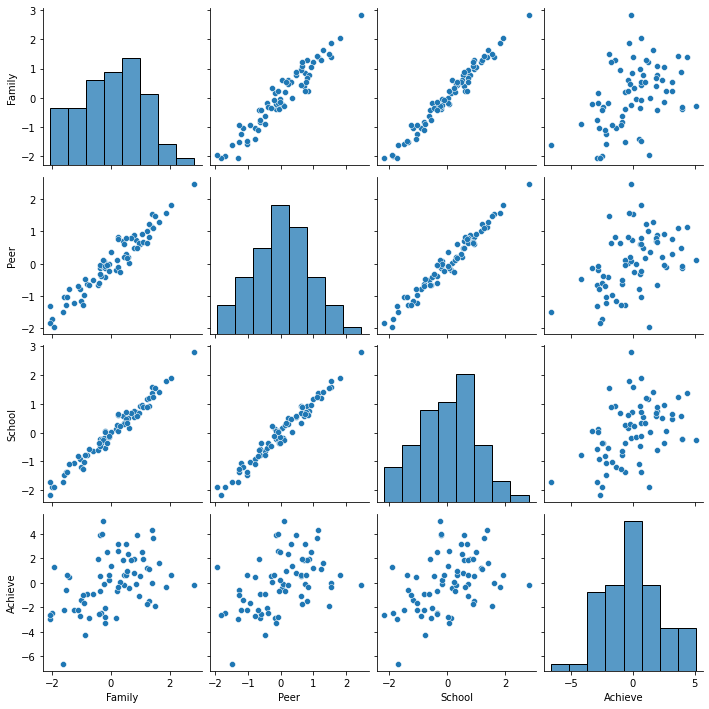

In [19]:
sns.pairplot(df)

In [20]:
df.corr()

,Family,Peer,School,Achieve
Family,1.000000,0.960081,0.985684,0.419459
Peer,0.960081,1.000000,0.982160,0.439846
School,0.985684,0.982160,1.000000,0.418101
Achieve,0.419459,0.439846,0.418101,1.000000


                            OLS Regression Results                            
Dep. Variable:                Achieve   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     5.717
Date:                Fri, 18 Mar 2022   Prob (F-statistic):            0.00153
Time:                        12:13:12   Log-Likelihood:                -148.20
No. Observations:                  70   AIC:                             304.4
Df Residuals:                      66   BIC:                             313.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0700      0.251     -0.279      0.7

C:\Users\genep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


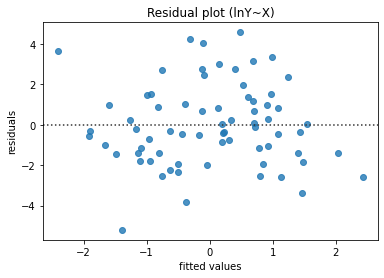

In [21]:
# Fit MLR on transformed response. Then, produce a residual plot. 
mlr2 = ols('Achieve ~ Family + Peer + School',df).fit()
print(mlr2.summary())
print("\nMSE = ", mlr2.mse_resid)

sns.residplot(mlr2.fittedvalues,mlr2.resid)
plt.title('Residual plot (lnY~X)')
plt.xlabel('fitted values')
plt.ylabel('residuals');

print("\nVIF of", mlr2.model.exog_names[1], vif(mlr.model.exog,1))
print("VIF of", mlr2.model.exog_names[2], vif(mlr.model.exog,2))
print("VIF of", mlr2.model.exog_names[3], vif(mlr.model.exog,3))

In [22]:
sm.stats.het_breuschpagan(mlr2.resid, mlr2.model.exog)

(0.38288774277761894,
 0.9437543538115123,
 0.12099798552379235,
 0.947429421660765)

In [23]:
# Improvement in variance of residuals (more homo). Log - linear model 
# is a better fit. Looking at p values of Omnibus and JB, 
# residuals are now normal.
# Adjusted R2 value has also increased, showing that the linear fit of the model
# has also improved.
# BP test also shows that residuals are homo.

In [24]:
# Model 3
# Centralise Predictors

df['X1_ctr'] = df['Family'] - np.mean(df['Family'])
df['X2_ctr'] = df['Peer'] - np.mean(df['Peer'])
df['X3_ctr'] = df['School'] - np.mean(df['School'])
df.tail()

,Family,Peer,School,Achieve,X1_ctr,X2_ctr,X3_ctr
65,0.53940,0.16182,0.33477,0.97034,0.490017,0.115506,0.302864
66,0.22491,0.74800,0.66182,3.16093,0.175527,0.701686,0.629914
67,1.48244,1.47079,1.54283,-1.90801,1.433057,1.424476,1.510924
68,2.05425,1.80369,1.90066,0.64598,2.004867,1.757376,1.868754
69,1.24058,0.64484,0.87372,-1.75915,1.191197,0.598526,0.841814


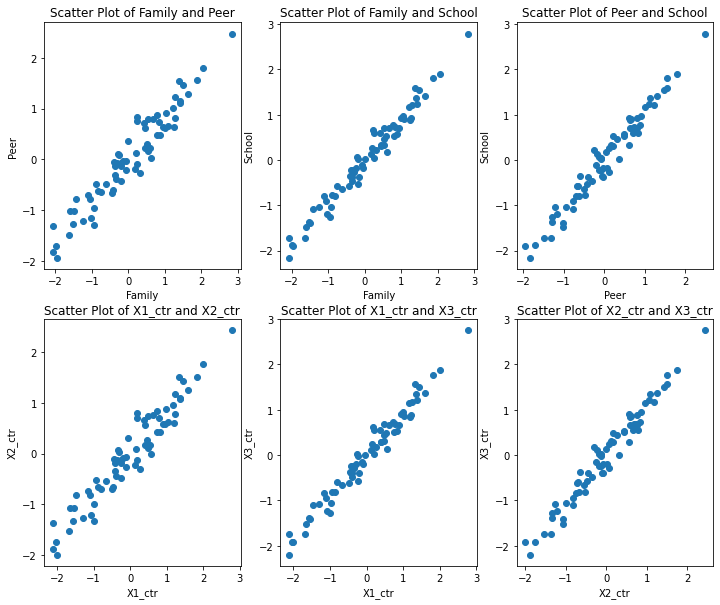

In [25]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(231)
plt.scatter(df.Family, df.Peer)
plt.title('Scatter Plot of Family and Peer')
plt.xlabel('Family')
plt.ylabel('Peer')

ax2 = fig.add_subplot(232)
plt.scatter(df.Family, df.School)
plt.title('Scatter Plot of Family and School')
plt.xlabel('Family')
plt.ylabel('School')

ax3 = fig.add_subplot(233)
plt.scatter(df.Peer, df.School)
plt.title('Scatter Plot of Peer and School')
plt.xlabel('Peer')
plt.ylabel('School')

ax4 = fig.add_subplot(234)
plt.scatter(df.X1_ctr, df.X2_ctr)
plt.title('Scatter Plot of X1_ctr and X2_ctr')
plt.xlabel('X1_ctr')
plt.ylabel('X2_ctr')

ax5 = fig.add_subplot(235)
plt.scatter(df.X1_ctr, df.X3_ctr)
plt.title('Scatter Plot of X1_ctr and X3_ctr')
plt.xlabel('X1_ctr')
plt.ylabel('X3_ctr')

ax6 = fig.add_subplot(236)
plt.scatter(df.X2_ctr, df.X3_ctr)
plt.title('Scatter Plot of X2_ctr and X3_ctr')
plt.xlabel('X2_ctr')
plt.ylabel('X3_ctr');

In [26]:
# this code computes covariance of predictors only
df.iloc[:,0:3].cov() 

,Family,Peer,School
Family,1.173218,0.961711,1.092776
Peer,0.961711,0.855253,0.929681
School,1.092776,0.929681,1.047631


In [27]:
# Compute the eigenvalues and eigenvectors using numpy's linear algebra function.
eva, evec = np.linalg.eig(df.iloc[:,0:3].cov())
print('Eigenvalues are:', eva)
print('\nEigenvectors are:\n', evec)
print('\nProportion of total variance:', eva/sum(eva))

Eigenvalues are: [3.0282838  0.03956284 0.00825592]

Eigenvectors are:
 [[-0.61732371 -0.67025631 -0.41190766]
 [-0.5241853   0.74086406 -0.41994072]
 [-0.5866355   0.04332342  0.80869145]]

Proportion of total variance: [0.98445476 0.01286135 0.00268389]


In [28]:
# Import the PCA function
from sklearn.decomposition import PCA

In [29]:
# Create the PCA instance with 3 components.
pca3 = PCA(n_components=3)
# Then fit predictor data to PCA, i.e., to determine linear coefficients.
# Variables will be automatically centred by default.
pca3.fit(df.iloc[:,0:3])

# Extract principal components, and the corresponding proportion of variance.

print('\nEigen values are:', pca3.explained_variance_)
print('\nEigen Vectors are:\n', pca3.components_)
print('\nProportion of total variance:', pca3.explained_variance_ratio_)
# Caution: Outputs of eig() and PCA() are organized differently in display.


Eigen values are: [3.0282838  0.03956284 0.00825592]

Eigen Vectors are:
 [[ 0.61732371  0.5241853   0.5866355 ]
 [-0.67025631  0.74086406  0.04332342]
 [ 0.41190766  0.41994072 -0.80869145]]

Proportion of total variance: [0.98445476 0.01286135 0.00268389]


In [30]:
# Transform original data Family & Peer & School to PC1 & PC2 & PC3 scores.
newX = pca3.transform(df.iloc[:,0:3])

# Append PC1 & PC2 & PC3 scores to (original) data frame
df['pc1'] = newX[:,0]
df['pc2'] = newX[:,1]
df['pc3'] = newX[:,2]
df.tail()

,Family,Peer,School,Achieve,X1_ctr,X2_ctr,X3_ctr,pc1,pc2,pc3
65,0.53940,0.16182,0.33477,0.97034,0.490017,0.115506,0.302864,0.540716,-0.229742,0.005424
66,0.22491,0.74800,0.66182,3.16093,0.175527,0.701686,0.629914,0.845700,0.429496,-0.142438
67,1.48244,1.47079,1.54283,-1.90801,1.433057,1.424476,1.510924,2.517711,0.160286,-0.033389
68,2.05425,1.80369,1.90066,0.64598,2.004867,1.757376,1.868754,3.255120,0.039163,0.052569
69,1.24058,0.64484,0.87372,-1.75915,1.191197,0.598526,0.841814,1.542930,-0.318511,0.061241


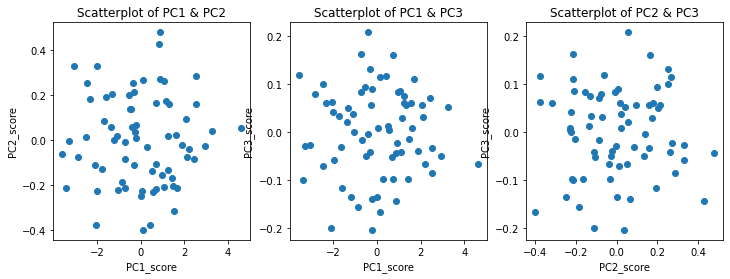

In [31]:
# Generate scatterplot between 3 PCs.  
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(131)
plt.scatter(df.pc1, df.pc2)
plt.title('Scatterplot of PC1 & PC2')
plt.xlabel('PC1_score')
plt.ylabel('PC2_score')

ax = fig.add_subplot(132)
plt.scatter(df.pc1, df.pc3)
plt.title('Scatterplot of PC1 & PC3')
plt.xlabel('PC1_score')
plt.ylabel('PC3_score')

ax = fig.add_subplot(133)
plt.scatter(df.pc2, df.pc3)
plt.title('Scatterplot of PC2 & PC3')
plt.xlabel('PC2_score')
plt.ylabel('PC3_score');

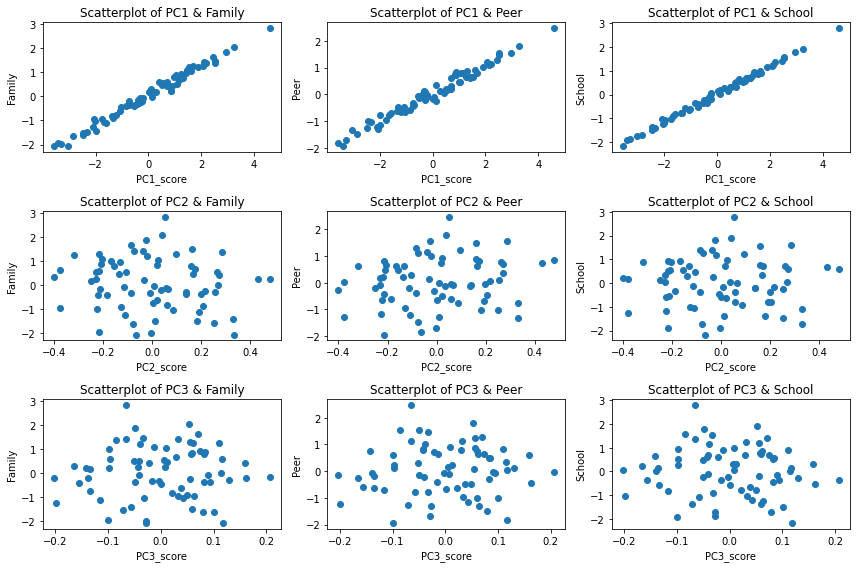

In [32]:
#Plotting Each Predictor Against PC

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(331)
plt.scatter(df.pc1, df.Family)
plt.title('Scatterplot of PC1 & Family')
plt.xlabel('PC1_score')
plt.ylabel('Family')

ax = fig.add_subplot(332)
plt.scatter(df.pc1, df.Peer)
plt.title('Scatterplot of PC1 & Peer')
plt.xlabel('PC1_score')
plt.ylabel('Peer')

ax = fig.add_subplot(333)
plt.scatter(df.pc1, df.School)
plt.title('Scatterplot of PC1 & School')
plt.xlabel('PC1_score')
plt.ylabel('School')

ax = fig.add_subplot(334)
plt.scatter(df.pc2, df.Family)
plt.title('Scatterplot of PC2 & Family')
plt.xlabel('PC2_score')
plt.ylabel('Family')

ax = fig.add_subplot(335)
plt.scatter(df.pc2, df.Peer)
plt.title('Scatterplot of PC2 & Peer')
plt.xlabel('PC2_score')
plt.ylabel('Peer')

ax = fig.add_subplot(336)
plt.scatter(df.pc2, df.School)
plt.title('Scatterplot of PC2 & School')
plt.xlabel('PC2_score')
plt.ylabel('School')

ax = fig.add_subplot(337)
plt.scatter(df.pc3, df.Family)
plt.title('Scatterplot of PC3 & Family')
plt.xlabel('PC3_score')
plt.ylabel('Family')

ax = fig.add_subplot(338)
plt.scatter(df.pc3, df.Peer)
plt.title('Scatterplot of PC3 & Peer')
plt.xlabel('PC3_score')
plt.ylabel('Peer')

ax = fig.add_subplot(339)
plt.scatter(df.pc3, df.School)
plt.title('Scatterplot of PC3 & School')
plt.xlabel('PC3_score')
plt.ylabel('School')

fig.tight_layout()


In [34]:
# Fit SLR model using PC1 score as the predictor.
slr = ols('Achieve ~ pc1', df).fit()
print(slr.summary())
print("\nMSE =", slr.mse_resid)

print("\nVIF of", slr.model.exog_names[1], vif(slr.model.exog,1))


                            OLS Regression Results                            
Dep. Variable:                Achieve   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     15.25
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           0.000219
Time:                        19:13:41   Log-Likelihood:                -149.21
No. Observations:                  70   AIC:                             302.4
Df Residuals:                      68   BIC:                             306.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0192      0.247      0.078      0.9